# Mini-batch Gradient Descent

Let batch size be $N$, and training size is $K$

$$l_i(w, b) = \frac{1}{N}\sum_{n= Ni + 1}^{N(i+1)} (\hat{y}_{n} - (wx_{n} + b))^2$$
where $i = 1, 2, 3, \ldots, I$

Iteration :$I = \frac{\text{training size}}{\text{batch size}} = \frac{K}{N}$

Mini-batch Gradient Descent use multiple samples at a time perform one iteration of Gradient Descent.

In [1]:
N = 10
K = 40
I = K // N
for i in range(I):
    print('init: ', N*i + 1)
    print('final: ', N*(i + 1))

init:  1
final:  10
init:  11
final:  20
init:  21
final:  30
init:  31
final:  40


# Example

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [3]:
def forward(X):
    return w * X + b

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [4]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        f = -3 * self.x + 1
        self.y = f + 0.1 * torch.randn(self.x.size())
        
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [5]:
dataset = Data()

In [6]:
len(dataset)

60

In [7]:
x, y = dataset[0]

In [8]:
x

tensor([-3.])

In [9]:
y

tensor([9.7482])

In [10]:
K = len(dataset)
N = 10
I = K // N
print('Iteration is ', I)

Iteration is  6


In [11]:
trainloader = DataLoader(dataset = dataset, batch_size = N)

### Train with dataloader

In [12]:
w = torch.tensor(0.0, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

In [13]:
lr = 0.1
COST = []
for epoch in range(4):
    total = 0
    for x, y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()

        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

        b.data = b.data - lr * b.grad.data
        b.grad.data.zero_()
        total += loss.item()
        
    COST.append(total)

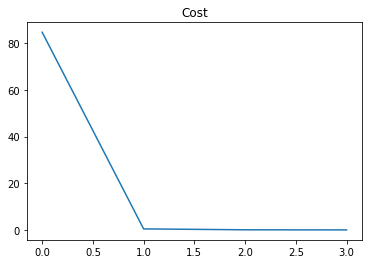

In [14]:
plt.plot(range(len(COST)), COST)
plt.title('Cost')
plt.show()

In [15]:
w

tensor(-3.0244, requires_grad=True)

In [16]:
b

tensor(0.9770, requires_grad=True)

**Batch size affect convergence rate.**